In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [56]:
original_data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Pakistan%20Intellectual%20Capital/Pakistan%20Intellectual%20Capital%20-%20Computer%20Science%20-%20Ver%201.csv', encoding="latin1")
df = original_data.copy()  
df.head()

,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS,On study leave
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN


In [57]:

df = df.rename(columns={
    'Teacher Name' : 'teacher_name',
    'University Currently Teaching' : 'current_university',
    'Department': 'department',
    'Province University Located': 'province',
    'Designation': 'designation',
    'Terminal Degree' : 'degree',
    'Graduated from': 'graduated_from',
    'Country': 'country',
    'Year': 'year',
    'Area of Specialization/Research Interests': 'specialization',
    'Other Information' : 'other_information'
})
df.head()

,S#,teacher_name,current_university,department,province,designation,degree,graduated_from,country,year,specialization,other_information
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS,On study leave
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S#                  1981 non-null   int64  
 1   teacher_name        1981 non-null   object 
 2   current_university  1981 non-null   object 
 3   department          1981 non-null   object 
 4   province            1981 non-null   object 
 5   designation         1918 non-null   object 
 6   degree              1440 non-null   object 
 7   graduated_from      1142 non-null   object 
 8   country             1200 non-null   object 
 9   year                499 non-null    float64
 10  specialization      750 non-null    object 
 11  other_information   163 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 185.8+ KB


In [59]:
Row, Col = df.shape
print(f'There are {Row} Rows and {Col} columns')
df.shape

There are 1981 Rows and 12 columns


(1981, 12)

In [60]:
df.drop(['S#','other_information'],axis=1, inplace=True)
df.isnull().sum()

teacher_name             0
current_university       0
department               0
province                 0
designation             63
degree                 541
graduated_from         839
country                781
year                  1482
specialization        1231
dtype: int64

In [61]:
specializations = pd.DataFrame(df['specialization'])
specializations['specialization'].isnull().sum()  

1231

In [62]:
specializations.dropna(inplace=True)

In [63]:
specializations['specialization'] = specializations.specialization.str.lower()
specializations['specialization'] = specializations.specialization.str.replace('.', '')
specializations['specialization'] = specializations.specialization.str.replace('and', '')
specializations['specialization'] = specializations.specialization.str.split(',')

<ipython-input-63-50e1edd71724>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  specializations['specialization'] = specializations.specialization.str.replace('.', '')


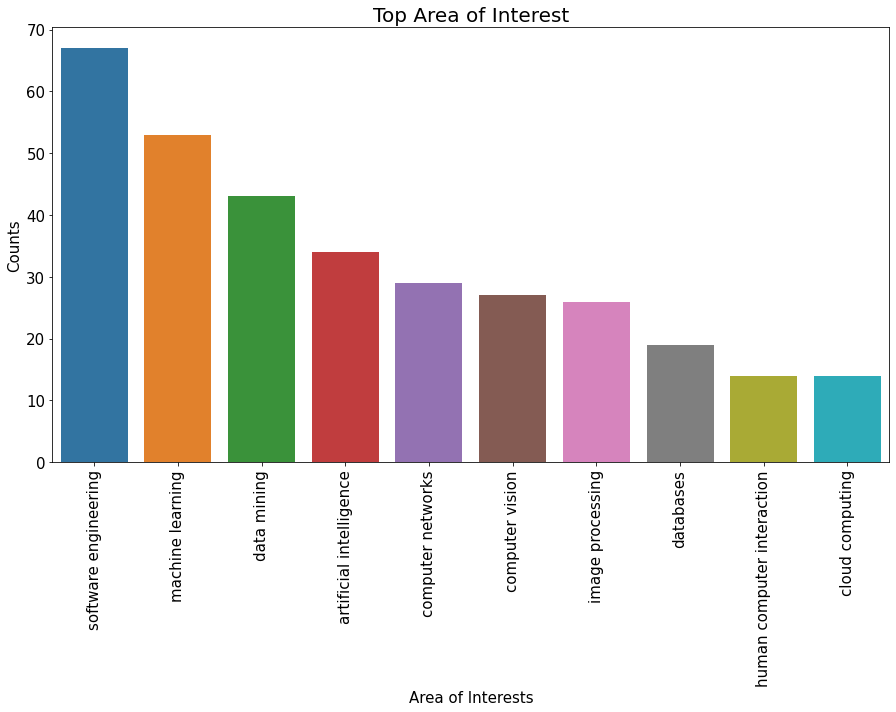

In [64]:
area_list = []

for i in specializations['specialization']:
    for j in i:
        area_list.append(j.strip())
df_area_interest = pd.DataFrame(area_list)
df_area_interest = df_area_interest.rename(columns={0:'area_of_interest'})
task1_area_interest = pd.DataFrame(df_area_interest.area_of_interest.value_counts())
area_of_interest = task1_area_interest.reset_index()
area_of_interest = area_of_interest.rename(columns={'index':'area_of_interest','area_of_interest':'count'})
plt.figure(figsize=(15,8))
sns.barplot(x=area_of_interest.loc[0:9,'area_of_interest'],y=area_of_interest.loc[0:9,'count'])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Area of Interests', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Top Area of Interest',fontsize=20)
plt.show()

In [65]:
data_science = 0
for i in area_of_interest['area_of_interest']:
    if i == 'data science':
        data_science +=1
print("Data Science:", data_science)

machine_learning = 0
for i in df_area_interest['area_of_interest']:
    if i == 'machine learning':
        machine_learning +=1
print('Machine Learning:' , machine_learning)

artificial_intelligence = 0
for i in df_area_interest['area_of_interest']:
    if i == 'artificial intelligence':
        artificial_intelligence +=1
    if i == 'ai':
        artificial_intelligence +=1
print('Artificial Intelligence:' , artificial_intelligence)

Data Science: 1
Machine Learning: 53
Artificial Intelligence: 37


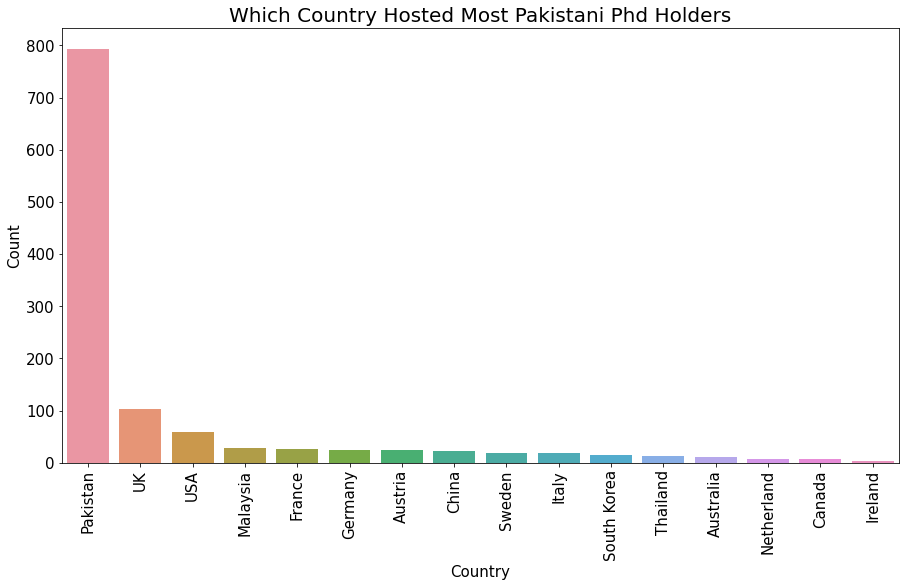

In [66]:
countries = pd.DataFrame(df['country'])
countries['country'] = countries['country'].str.strip()
countries.loc[countries['country'] == "Urbana" , "country"] = "USA"
countries.loc[countries['country'] == "Macau" , "country"] = "China"
countries.dropna(inplace=True)
task_country = pd.DataFrame(countries.country.value_counts())
task_country = task_country.reset_index()
task_country = task_country.rename(columns = {
    "index" : 'country',
    'country' : 'counts'
})
plt.figure(figsize=(15,8))
sns.barplot(x=task_country.loc[0:15,'country'], y=task_country.loc[0:15,'counts'])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Which Country Hosted Most Pakistani Phd Holders', fontsize=20)
plt.show()

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


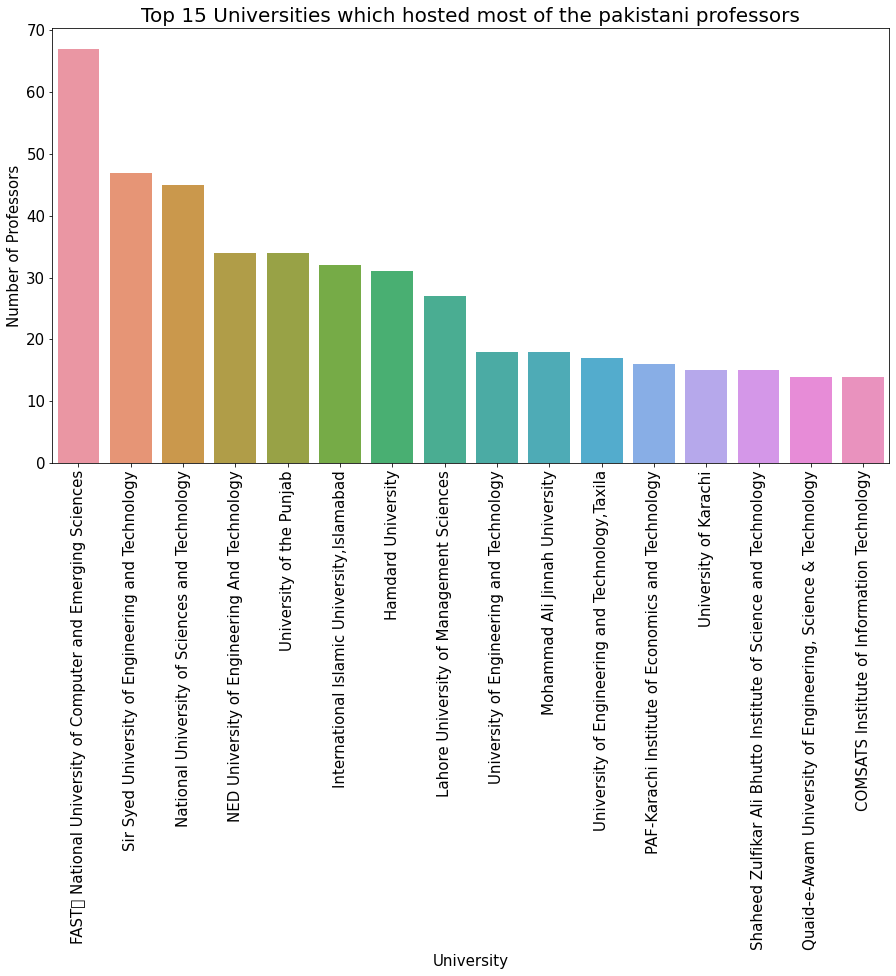

In [67]:
universities = pd.DataFrame(df['graduated_from'])
universities.dropna(inplace=True)
task_university = pd.DataFrame(universities.graduated_from.value_counts())
task_university = task_university.reset_index()

task_university = task_university.rename(columns={
    'index': 'graduated_from',
    'graduated_from': 'count'
})
plt.figure(figsize=(15, 8))
sns.barplot(x=task_university.loc[0:15, 'graduated_from'], y=task_university.loc[0:15, 'count'])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('University', fontsize=15)
plt.ylabel('Number of Professors', fontsize=15)
plt.title('Top 15 Universities which hosted most of the pakistani professors', fontsize=20)
plt.show()

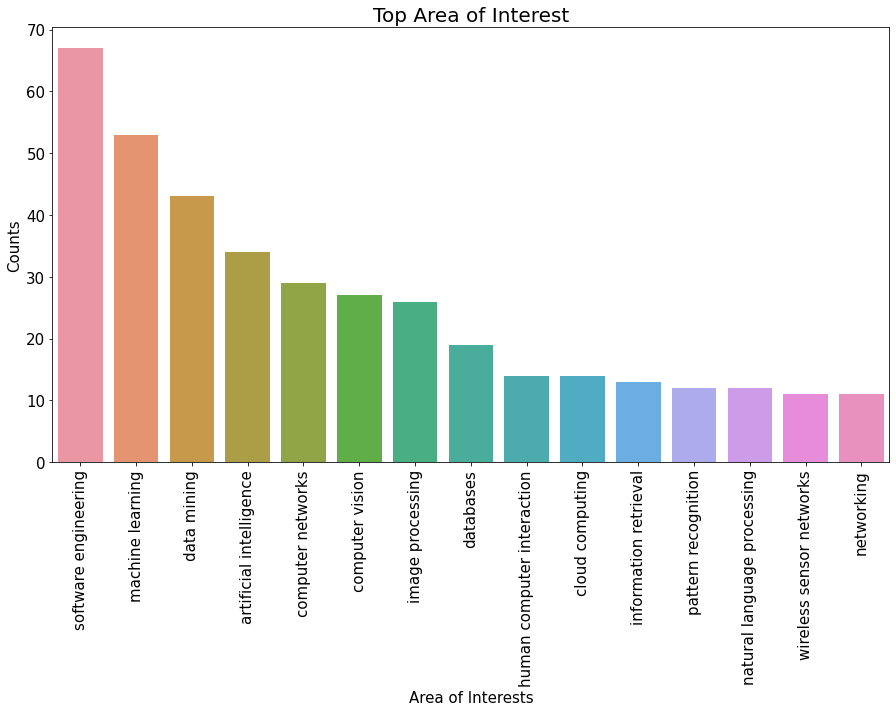

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x=area_of_interest.loc[0:14,'area_of_interest'],y=area_of_interest.loc[0:14,'count'])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Area of Interests', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Top Area of Interest',fontsize=20)
plt.show()